# CLUSTERING - KMEANS

<table>
<tr>
    <td>Nama</td>
    <td> : </td>
    <td><strong>Toufani Rizal Alfarisi</strong></td>
</tr>
<tr>
    <td>dataset</td>
    <td> : </td>
    <td><strong> Teaching Assistand Evaluation </strong></td>
</tr>
<tr>
    <td>Url</td>
    <td> : </td>
    <td><strong><a> https://archive.ics.uci.edu/ml/datasets/Adult </a></strong></td>
</tr>
<tr>
    <td>Algoritma</td>
    <td> : </td>
    <td><strong>CLUSTERING - KMEANS</strong></td>
</tr>
</table>

In [110]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [111]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [112]:
# lihat deskripsi / meta datasetnya
with open("adult.names") as r:
    meta_dataset = r.read()

In [113]:
# baca datasetnya
data = pd.read_csv("dataset/tae.data")
data.head()

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [114]:
# ganti nama colom nya dengan angka
data.columns = [ "fitur_"+str(i) for i in range(len(data.columns)) if i != 6]
data.head()

,fitur_0,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [115]:
# lihat unique data setiap kolom 
cols = data.columns
for col in cols:
    print(f"{col} == > \n", data.loc[:, col].unique())

fitur_0 == > 
 [2 1]
fitur_1 == > 
 [15 23  5  7  9 10 22 13 18  6 25  2  1  8 14 21 11 16  4 17 20 12 24  3
 19]
fitur_2 == > 
 [ 3  2 11  5 22  1 21 17 25  7  9 15 13  8 16 19 14  6 12 18 23 26 24 20
  4 10]
fitur_3 == > 
 [1 2]
fitur_4 == > 
 [17 49 33 55 20 19 27 58  9 30 29 39 42 43 10 46 23 31 22 37 13 24 38 28
 51 36 21 48 25 11 45 18 14 35 15 32 34 66 12  3  7 54 16 44  5 26]
fitur_5 == > 
 [3 2 1]


In [116]:
# training 
model_clustering = KMeans(n_clusters=5)
model_clustering.fit(data)
data_ = data.copy()
data_reg = data.copy()

# lakkukan predict terhadap data yang sudah dicluster/training
y_pred = model_clustering.predict(data)

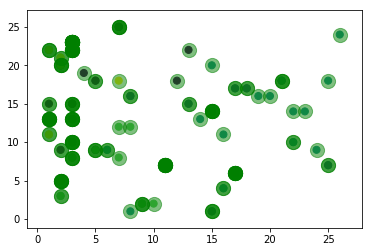

In [104]:
data_pred = data_.values
plt.scatter(data_pred[:, 2], data_pred[:, 1], c=y_pred, s=50, cmap='viridis')
centers = model_clustering.cluster_centers_
plt.scatter(data_pred[:, 2], data_pred[:, 1], c='g', s=200, alpha=0.5) 

# REGRESI - REGRESI LINEAR

<table>
<tr>
    <td>Nama</td>
    <td> : </td>
    <td><strong>Toufani Rizal Alfarisi</strong></td>
</tr>
<tr>
    <td>dataset</td>
    <td> : </td>
    <td><strong>Teaching Assistand Evaluation </strong></td>
</tr>
<tr>
    <td>Url</td>
    <td> : </td>
    <td><strong><a> https://archive.ics.uci.edu/ml/datasets/Teaching+Assistant+Evaluation </a></strong></td>
</tr>
<tr>
    <td>Algoritma</td>
    <td> : </td>
    <td><strong>REGRESI - REGRESI LINEAR</strong></td>
</tr>
</table>

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [123]:
# lakukan normalisasi data 
ss = StandardScaler()
data_reg = ss.fit_transform(data_reg)

In [127]:
# pisahkan dataset menjadi feature dan label
x = data_reg[:, :-1]
y = data_reg[:, 1]
# print(x.head())

In [128]:
# split/pecah dataset menjadi training dan testing dengan 
# ukuran test sebanyak 10% dan training sebanyak 90%
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.1, 
    random_state=46,
)

In [129]:
# lihat ukuran setiap pecahannya 
print('x_train ==> ', x_train.shape)
print('y_train ==> ', y_train.shape)
print('x_test ==> ', x_test.shape)
print('y_test ==> ', y_test.shape)

x_train ==>  (135, 5)
y_train ==>  (135,)
x_test ==>  (15, 5)
y_test ==>  (15,)


In [130]:
model_reg = LinearRegression()
model_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [132]:
y_pred = model_reg.predict(x_test)
mse = metrics.mean_squared_error(y_test, y_pred) * 100
mae = metrics.mean_absolute_error(y_test, y_pred) * 100 
r2_score = metrics.r2_score(y_test, y_pred)
print("mean-squared-error \n", mse)
print("mean-absolute-error \n", mae)
print('r2_score \n ', r2_score)

mean-squared-error 
 2.5431583927309387e-29
mean-absolute-error 
 4.140206695997979e-14
r2_score 
  1.0
